# Dot plots and the mean

## Python setup

In [8]:
# Setup
%matplotlib inline
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Custom colors
blue = "#3F83F4"
blue_dark = "#062089"
blue_light = "#8DC0F6"
blue_lighter = "#BBE4FA"
grey = "#9C9C9C"
grey_dark = "#777777"
grey_light = "#B2B2B2"
orange = "#EF8733"
colors_blue = [blue, blue_light]

## Import data

In [9]:
ROOT = "https://raw.githubusercontent.com/kirenz/modern-statistics/main/data/"
DATA = "loan50.csv"

df = pd.read_csv(ROOT + DATA)

# We round values for our dot plot
df["interest_rate"] = df["interest_rate"].astype("int64")

## Dot plot

A dot plot of interest rate for the loan50 dataset. The rates have been rounded.

In [10]:
import numpy as np

# Prepara data
mean = df["interest_rate"].mean()
interest_rate = df["interest_rate"]
values, counts = np.unique(interest_rate, return_counts=True)

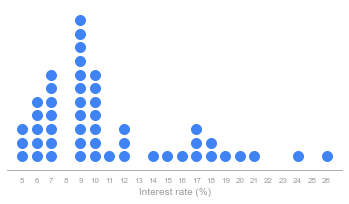

In [11]:
# Create dot plot
fig, ax = plt.subplots(figsize=(6, 3))
for value, count in zip(values, counts):
    ax.plot([value]*count, list(range(count)), 'o', ms=10, linestyle='', color=blue)
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)
    
# Define optics
ax.yaxis.set_visible(False)
ax.set_ylim(-1, max(counts))
ax.spines['bottom'].set_color(grey)
ax.set_xticks(range(min(values), max(values)+1))
ax.tick_params(axis='x', length=0, pad=8, labelsize=8, colors=grey)
# Label and anotation
plt.xlabel("Interest rate (%)", color=grey)

plt.show();

## Dot plot with mean


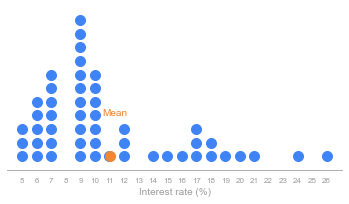

In [12]:
# Create dot plot
fig, ax = plt.subplots(figsize=(6, 3))
for value, count in zip(values, counts):
    ax.plot([value]*count, list(range(count)), 'o', ms=10, linestyle='', color=blue)
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)
# Define optics
ax.yaxis.set_visible(False)
ax.set_ylim(-1, max(counts))
ax.spines['bottom'].set_color(grey)
ax.set_xticks(range(min(values), max(values)+1))
ax.tick_params(axis='x', length=0, pad=8, labelsize=8, colors=grey)
# Label and anotation
plt.xlabel("Interest rate (%)", color=grey)
ax.plot(mean, 0, 'o', ms=10, color=orange)
ax.annotate(text='Mean', xy=(mean-0.5, 3), color=orange)

plt.show();

In [13]:
print(mean)

11.04


The sample mean can be calculated as the sum of the observed values divided by the number of observations:  


$$ \bar{x} = \frac{x_1 + x_2 + \cdots + x_n}{n} $$

## Asthma example

Results of a trial of 1500 adults that suffer from asthma;

In [14]:
d= {'Description': ["Number of patients", "Total asthma attacks"], 'New drug': [500, 200], 'Standard drug': [1000, 300]}
drug_asthma = pd.DataFrame(data=d)
drug_asthma

,Description,New drug,Standard drug
0,Number of patients,500,1000
1,Total asthma attacks,200,300


In [15]:
# Asthma attacks per patients
new_drug = 200/500
standard_drug = 300/1000

print("New drug: 200/500 = ", new_drug, "asthma attacks per patient")
print("Standard drug: 300/1000 = ", standard_drug, "asthma attacks per patient")


New drug: 200/500 =  0.4 asthma attacks per patient
Standard drug: 300/1000 =  0.3 asthma attacks per patient


## County example

In [16]:
ROOT = "https://raw.githubusercontent.com/kirenz/modern-statistics/main/data/"
DATA = "county.csv"

df_county = pd.read_csv(ROOT + DATA)

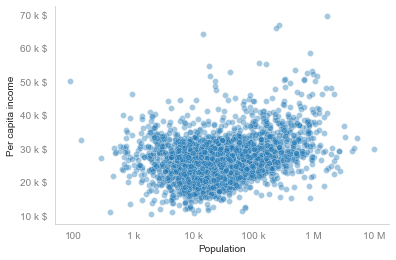

In [17]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots()

sns.scatterplot(data=df_county, x="pop2017", y= "per_capita_income", palette=colors_blue, alpha=0.4)

ax.set_xscale('log')
ax.yaxis.set_major_formatter('{x:1.0f} k $')
ax.yaxis.set_major_formatter(ticker.EngFormatter(' $'))
ax.yaxis.set_tick_params(which='major', labelcolor='grey', labelleft=True)
ax.xaxis.set_major_formatter(ticker.EngFormatter(''))
ax.xaxis.set_tick_params(which='major', labelcolor='grey')  
plt.ylabel("Per capita income")
plt.xlabel("Population")
sns.despine()

plt.show();